# Convolutional Neural Networks

Red neuronalconvolucional implementada sobre el conjunto de datos MNIST, basado en el curso de Deep learning con Pytorch de Datacamp 


## Importando las librerías


In [0]:
### Importando las librerias ###
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

## Dataset

Obteniendo y preparando los datos

In [0]:
### Transform the data to torch tensors and normalize it ###
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307,), ((0.3081,)))])

### Prepare training set and testing set ###
trainset = torchvision.datasets.MNIST('mnist', train=True,
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False,
			   download=True, transform=transform)

### Prepare training loader and testing loader ###
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
										 shuffle=False, num_workers=0) 

0it [00:00, ?it/s]

9920512it [00:01, 8657347.16it/s]                            


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 134779.62it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2086957.36it/s]                           
0it [00:00, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 53512.26it/s]            

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
### Compute the shape of the training set and testing set ###
trainset_shape = trainloader.dataset.train_data.shape
testset_shape = testloader.dataset.test_data.shape

### Print the computed shapes ###
print("trainset_shape : {}".format(trainset_shape))
print("testset_shape: {}".format(testset_shape))

### Compute the size of the minibatch for training set and testing set ###
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size

### Predicted ###
trainset_predicted = np.array([])
testset_predicted = np.array([])

### Print sizes of the minibatch ###
print("trainset_batchsize: {}".format(trainset_batchsize))
print("testset_batchsize: {}".format(testset_batchsize))

trainset_shape : torch.Size([60000, 28, 28])
testset_shape: torch.Size([10000, 28, 28])
trainset_batchsize: 100
testset_batchsize: 100


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([100, 1, 28, 28])
tensor(2)


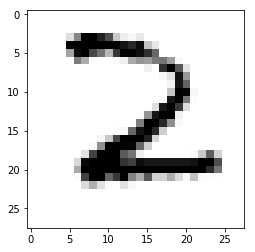

In [0]:
import matplotlib.pyplot as plt
images, labels = next(iter(trainloader))
print(images.shape)
print(labels[0])
plt.imshow(images[0,0],cmap='Greys')

## CNN

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
		
        ### Instantiate the ReLU nonlinearity ###
        self.relu = nn.ReLU()
        
        ### Instantiate two convolutional layers ###
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        
        ### Instantiate a max pooling layer ###
        self.pool = nn.MaxPool2d(2, 2)
        
        ### Instantiate a fully connected layer ###
        self.fc = nn.Linear(7 * 7 * 10, 10)

    def forward(self, x):

        ### Apply conv followd by relu, then in next line pool ###
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        ### Apply conv followd by relu, then in next line pool ###
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        ### Prepare the image for the fully connected layer ###
        x = x.view(-1, 7*7*10)

        ### Apply the fully connected layer and return the result ###
        return self.fc(x)

### Entrenamiento

Entrenamiento

In [0]:
import torch.optim as optim
import numpy as np


def train(model,epochs,trainloader,criterion,optimizer):
  
  trainset_predicted_X = np.array([])
  global lista
  lista=[]
  sum_s=0
  for epoch in range(epochs):
    running_loss = 0
    total_train=0
    correct_train=0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        model.train()
        optimizer.zero_grad()

        ### Compute the forward pass ###
        outputs = model(inputs)
            
        ### Compute the loss function ###
        loss = criterion(outputs,labels)
            
        ### Compute the gradients ###
        loss.backward()
        
        ### Update the weights ###
        optimizer.step()

        ### Loss ###
        running_loss += loss.data.item()

        ### Argmax the results of the net ###
        _, predicted = torch.max(outputs.data, 1)
        
        #if epoch==(epochs-1) :
        #trainset_predicted_X = np.append(trainset_predicted_X,predicted.numpy())
        total_train += labels.size(0)
        #lista.append(predicted)
        correct_train += (predicted == labels).sum().item()
        if list(predicted)==list(labels):
          sum_s+=1
          #print(i+1,sum_s,predicted,labels)'''
    #print("predicted : {}".format(predicted), " labels: {}".format(labels))'''
    testing_loss, testing_accuracy, testing_pred  = validate(model,criterion,testloader)
    training_loss, training_accuracy, training_pred  = validate(model,criterion,trainloader)
    

    print(training_pred.shape)
    print(testing_pred.shape)
    print("correct: ",correct_train)
    print("sum_s",sum_s)
    if epoch == epochs-1:
      print("entro")
      global testset_predicted
      global trainset_predicted
      trainset_predicted = np.copy(training_pred)
      testset_predicted = np.copy(testing_pred)
      print(trainset_predicted)
      print(testset_predicted)

    print("Epoch: {}".format(epoch+1),
          "Training Loss: {:.3f}".format(running_loss/len(trainloader)),
          "Training Loss2: {:.3f}".format(training_loss),
          "Training Accuracy: {:.3f}".format((100*correct_train/total_train)),
          "Training Accuracy2: {:.3f}".format(training_accuracy),
          "Testing Loss: {:.3f}".format(testing_loss),
          "Testing Accuracy: {:.3f}".format(testing_accuracy))
  
  #global trainset_predicted
  #trainset_predicted = np.copy(trainset_predicted_X)

def validate(model,criterion,loader):
  # Set the model in eval mode
  model.eval()

  test_loss = 0
  correct, total = 0, 0
  testset_predicted_Y = np.array([])
  
  # Iterate over the data in the test_loader
  for data in loader:
    
      # Get the image and label from data
      image, label = data
      
      # Make a forward pass in the net with your image
      output = model(image)

      test_loss += criterion(output, label).data.item()

      # Argmax the results of the net
      _, predicted_v = torch.max(output.data, 1)

      testset_predicted_Y = np.append(testset_predicted_Y,predicted_v.numpy())
      total += label.size(0)
      correct += (predicted_v == label).sum().item()
  print(testset_predicted_Y[0:100])
  #global testset_predicted
  #testset_predicted = np.copy(testset_predicted_Y)
  return test_loss/len(loader), (100 * correct / total), testset_predicted_Y
      

In [0]:
list(torch.tensor([1,2,3,4]))

[tensor(1), tensor(2), tensor(3), tensor(4)]

Evaluando

In [0]:
epochs = 1
model = CNN()
criterion = nn.CrossEntropyLoss()

### Instantiate the Adam optimizer and Cross-Entropy loss function ###
optimizer = optim.Adam(model.parameters(), lr=3e-4)

train(model,epochs,trainloader,criterion,optimizer)

[7. 2. 1. 0. 4. 1. 4. 9. 5. 9. 0. 6. 9. 0. 1. 5. 9. 7. 3. 4. 9. 6. 6. 5.
 4. 0. 7. 4. 0. 1. 3. 1. 3. 6. 7. 2. 7. 1. 2. 1. 1. 7. 4. 2. 3. 5. 1. 2.
 4. 4. 6. 3. 5. 5. 6. 0. 4. 1. 9. 5. 7. 8. 9. 3. 7. 4. 6. 4. 3. 0. 7. 0.
 2. 9. 1. 7. 3. 2. 9. 7. 9. 6. 2. 7. 8. 4. 7. 3. 6. 1. 3. 6. 9. 3. 1. 4.
 1. 7. 6. 9.]
[1. 2. 0. 6. 7. 7. 0. 2. 2. 2. 3. 7. 2. 2. 7. 1. 1. 9. 9. 8. 5. 9. 1. 3.
 2. 3. 9. 1. 5. 7. 7. 7. 6. 3. 7. 0. 6. 8. 4. 6. 5. 7. 7. 1. 7. 9. 8. 5.
 8. 7. 7. 9. 5. 4. 1. 4. 2. 4. 0. 7. 1. 8. 8. 6. 4. 3. 3. 1. 4. 9. 7. 3.
 8. 9. 8. 9. 4. 7. 7. 4. 6. 4. 4. 1. 1. 9. 9. 3. 5. 7. 4. 8. 3. 7. 2. 8.
 8. 1. 6. 4.]
(60000,)
(10000,)
correct:  48806
sum_s 0
entro
[1. 2. 0. ... 8. 0. 6.]
[7. 2. 1. ... 4. 5. 6.]
Epoch: 1 Training Loss: 0.734 Training Loss2: 0.270 Training Accuracy: 81.343 Training Accuracy2: 92.157 Testing Loss: 0.258 Testing Accuracy: 92.720


In [0]:
print("trainset_predicted.shape : {}".format(trainset_predicted.shape[0]))
print("testset_predicted.shape: {}".format(testset_predicted.shape[0]))



trainset_predicted.shape : 60000
testset_predicted.shape: 10000


In [0]:
trainset.train_labels[59990:60000]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [0]:
trainset.train_labels[59989]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor(8)

In [0]:
trainset_predicted[59989]

tensor(9)

tensor(8)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


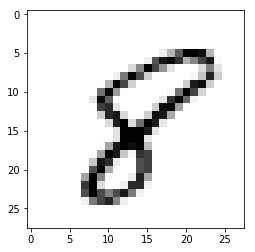

In [0]:
import matplotlib.pyplot as plt
#images, labels = next(iter(trainloader))
#print(images.shape)
#print(len(images[0,0]))
print(trainset.train_labels[59989])
plt.imshow(trainset.data[59989],cmap='Greys')

In [0]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [0]:
trainset_predicted[59990:60000]

array([1., 1., 9., 2., 6., 5., 7., 2., 6., 7.])

In [0]:
print(model)

CNN(
  (relu): ReLU()
  (conv1): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=490, out_features=10, bias=True)
)


In [0]:
trainset_predicted

array([3., 1., 3., ..., 2., 1., 1.])

In [0]:
trainset.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [0]:
testset_predicted

array([7., 2., 1., ..., 4., 5., 6.])

In [0]:
testset.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7, 2, 1,  ..., 4, 5, 6])

In [0]:
### Se convierte a un tensor de enteros testset_predicted ###
testset_predicted = torch.from_numpy(testset_predicted)
trainset_predicted = torch.from_numpy(trainset_predicted)
testset_predicted = testset_predicted.type(torch.LongTensor)
trainset_predicted = trainset_predicted.type(torch.LongTensor)

In [0]:
torch.tensor(5)==torch.tensor(4)

tensor(0, dtype=torch.uint8)

In [0]:
def CalcularCorrectos():
  for 

In [0]:
sum_trs = 0
for i,val in enumerate(trainset.train_labels):
  if val.item()==trainset_predicted[i].item() :
    
    sum_trs +=1
print(sum_trs)

sum_tes = 0
for i,val in enumerate(testset.test_labels):
  if val.item()==testset_predicted[i].item() :
    sum_tes +=1
print(sum_tes)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


6002
9272


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
trainset.train_labels[trainset.train_labels!=trainset_predicted].shape

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([54001])

In [0]:
trainset.train_labels.shape

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])

In [0]:
trainset.train_labels[0].item()==trainset_predicted[0].item()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


False

In [0]:
trainset.train_labels[0:30]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7])

In [0]:
trainset_predicted[0:30]

tensor([3, 5, 6, 0, 9, 6, 9, 3, 1, 4, 5, 3, 4, 0, 9, 6, 2, 2, 3, 3, 0, 3, 1, 4,
        2, 1, 4, 9, 3, 4])

In [0]:
testset.test_labels[0:30]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1])

In [0]:
testset_predicted[0:30]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1])

In [0]:
#la cantidad de imágenes predecidas correctamente
print('La cantidad de imágenes predecidas correctamente')
print(correct)

#el número de imágenes en las que se equivocó la red neuronal
print('El número de imágenes en las que se equivocó la red neuronal')
print(10000-correct)

### Evaluación



In [0]:
#la cantidad de imágenes predecidas correctamente
print('La cantidad de imágenes predecidas correctamente')
print(correct)

#el número de imágenes en las que se equivocó la red neuronal
print('El número de imágenes en las que se equivocó la red neuronal')
print(10000-correct)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


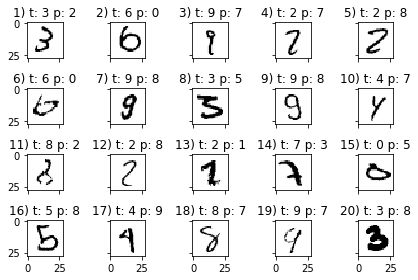

In [0]:
import matplotlib.pyplot as plt


#mostrar 20 imágenes en las que se cometió error en la predicción

miscl_img = testset.data[testset.test_labels != testset_predicted][:20]
correct_lab = testset.test_labels[testset.test_labels != testset_predicted][:20]
miscl_lab = testset_predicted[testset.test_labels != testset_predicted][:20]

fig, ax = plt.subplots(nrows=4,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()

lista_etiquetas=[]

for i in range(20):
  img = miscl_img[i]
  ax[i].imshow(img, cmap='Greys')
  ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))


plt.tight_layout()
plt.show()